# E-Commerce – EDA Process

**BY:**

**Santhosh M**

**BE-Computer science Engineering**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Ec = pd.read_csv("Ecommerce - UK Retailer.csv",  encoding= 'unicode_escape')

In [3]:
Ec.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
Ec.size

4335272

In [5]:
Ec.shape

(541909, 8)

In [6]:
Ec.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

In [7]:
Ec.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
Ec.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# TASK 1:  Perform Basic EDA

## a. Boxplot – All Numeric Variables 
 

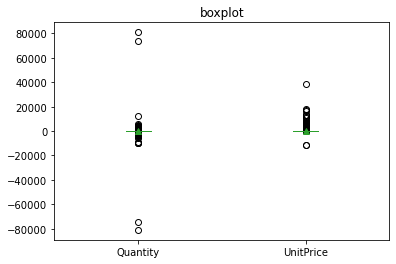

In [9]:
DF = pd.DataFrame({'Quantity': Ec["Quantity"], 'UnitPrice': Ec["UnitPrice"]})

ax = DF[['Quantity', 'UnitPrice']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

## b. Histogram – All Numeric Variables

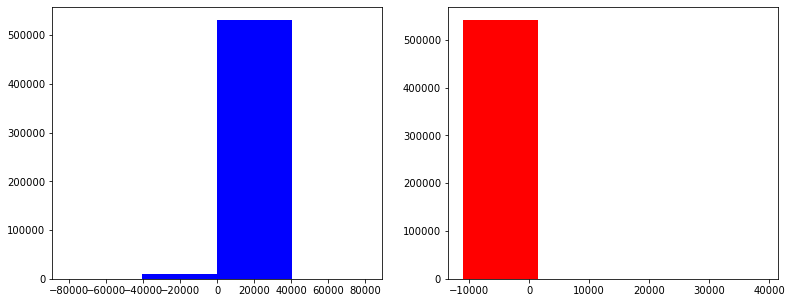

In [12]:
plt.figure(figsize = (13,5))
plt.plot([1,2,3])
plt.subplot(121)
plt.hist(x = col[0],data = Ec,bins = 4, color = "blue")
plt.subplot(122)
plt.hist(x = col[1],data = Ec,bins = 4, color = "red")
plt.show()

## c. Distribution Plot – All Numeric Variables  

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


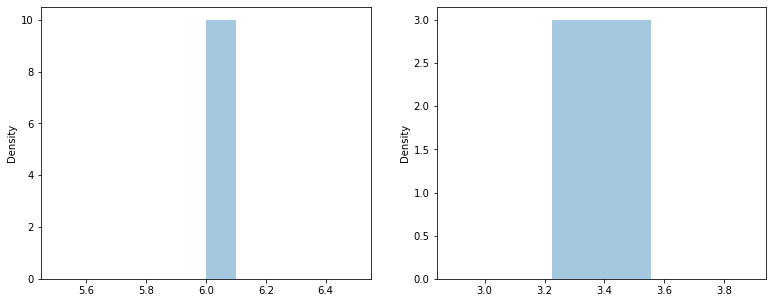

In [19]:
plt.figure(figsize = (13,5))
plt.plot([1,2,3])
plt.subplot(121)
sns.distplot(x = Ec["Quantity"][0],bins = 10)
plt.subplot(122)
sns.distplot(x = Ec["UnitPrice"][1],bins = 3)
plt.show()

## d. Aggregation for all numerical Columns 


In [21]:
Ec.aggregate({"Quantity":['sum', 'min','max'],
              "UnitPrice":['sum','max', 'min']})

,Quantity,UnitPrice
max,80995,38970.000
min,-80995,-11062.060
sum,5176450,2498803.974


## e. Unique Values across all columns 
 

In [25]:
nunique = pd.concat([Ec["InvoiceNo"],Ec["StockCode"],Ec["Description"],Ec["Quantity"],Ec["InvoiceDate"],Ec["UnitPrice"],Ec["CustomerID"],Ec["Country"]]).nunique()
print("No of unique columns:",nunique)

No of unique columns: 64142


In [27]:
unique = pd.concat([Ec["InvoiceNo"],Ec["StockCode"],Ec["Description"],Ec["Quantity"],Ec["InvoiceDate"],Ec["UnitPrice"],Ec["CustomerID"],Ec["Country"]]).unique()
print("Unique values are : ",unique)

Unique values are :  ['536365' '536366' '536367' ... 'European Community' 'Malta' 'RSA']


## f. Duplicate values across all columns

In [29]:
dup = Ec.duplicated().sum()
print("no of duplicates values : ",dup)

no of duplicates values :  5268


In [30]:
dc = Ec[Ec.duplicated()]
dc

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


## g. Correlation – Heatmap - All Numeric Variables


In [31]:
Df = pd.DataFrame({'Quantity': Ec["Quantity"], 'UnitPrice': Ec["UnitPrice"]})

In [33]:
DF.corr()

,Quantity,UnitPrice
Quantity,1.000000,-0.001235
UnitPrice,-0.001235,1.000000


<AxesSubplot:>

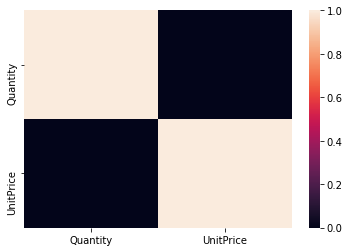

In [32]:
sns.heatmap(DF.corr())

## h. Regression Plot - All Numeric Variables 

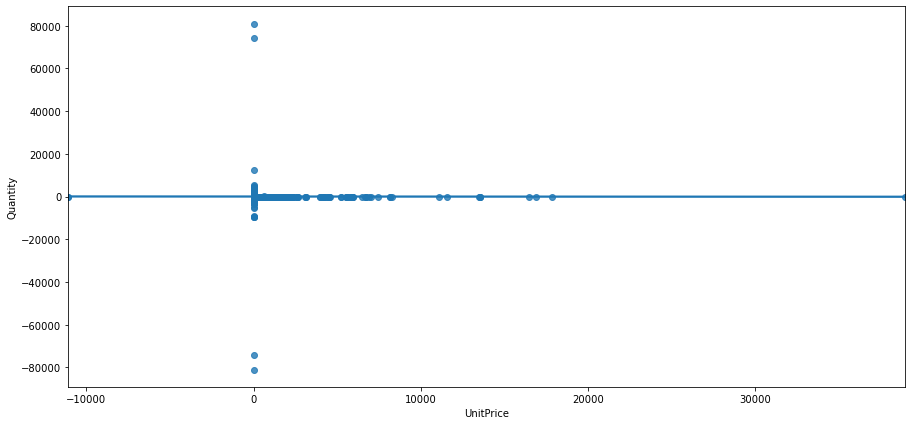

In [35]:
plt.figure(figsize = (15,7))
sns.regplot(x="UnitPrice", y="Quantity", data=Ec)
plt.show()

## i. Bar Plot – Every Categorical Variable vs every Numerical Variable

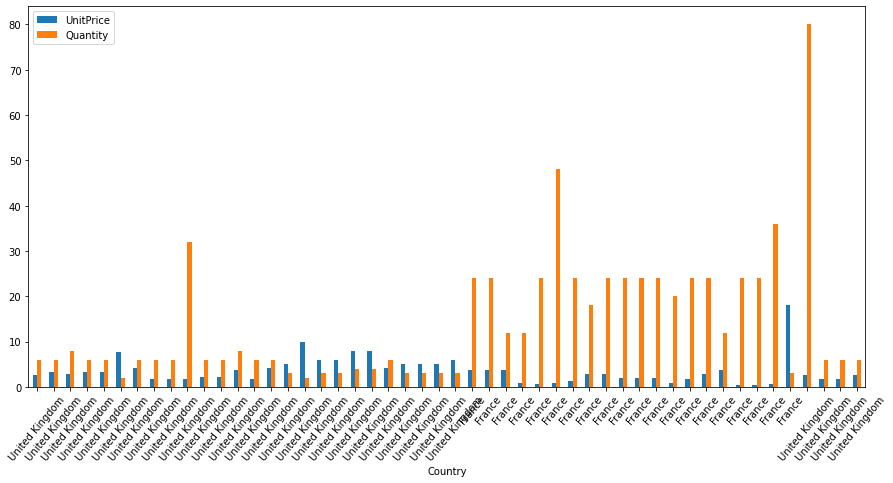

In [39]:
Ec.head(50).plot(x="Country", y=["UnitPrice", "Quantity"], kind="bar", figsize=(15,7))
plt.xticks(rotation=50)
plt.show()

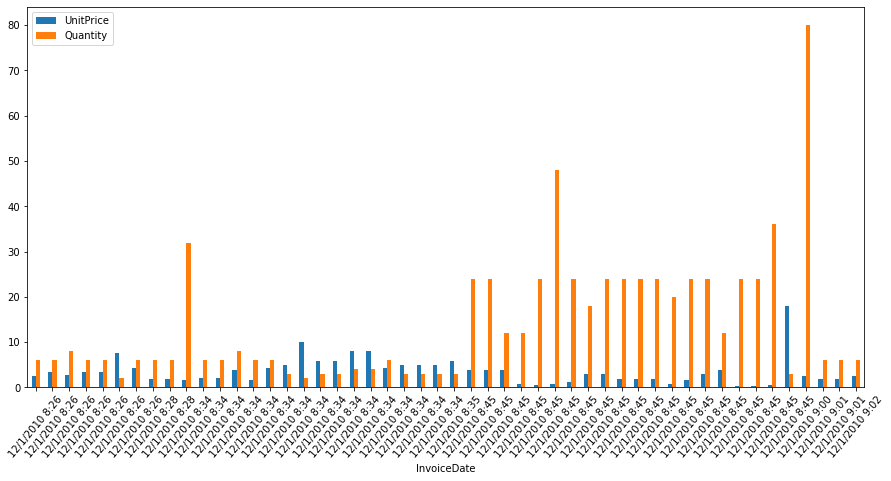

In [40]:
Ec.head(50).plot(x="InvoiceDate", y=["UnitPrice", "Quantity"], kind="bar", figsize=(15,7))
plt.xticks(rotation=50)
plt.show()

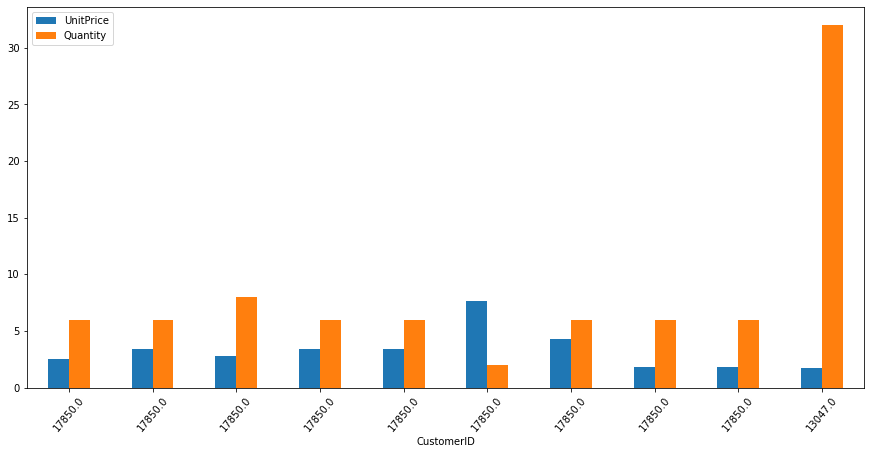

In [41]:
Ec.head(10).plot(x="CustomerID", y=["UnitPrice", "Quantity"], kind="bar",figsize=(15,7))
plt.xticks(rotation=50)
plt.show()

## j. Pair plot - All Numeric Variables

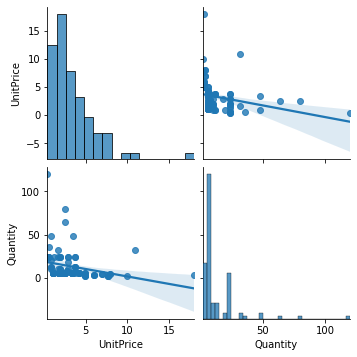

In [42]:
sns.pairplot(Ec.head(100), vars=["UnitPrice", "Quantity"], kind='reg')
plt.show()

## k. Line chart to show the trend of data - All Numeric/Date Variables 

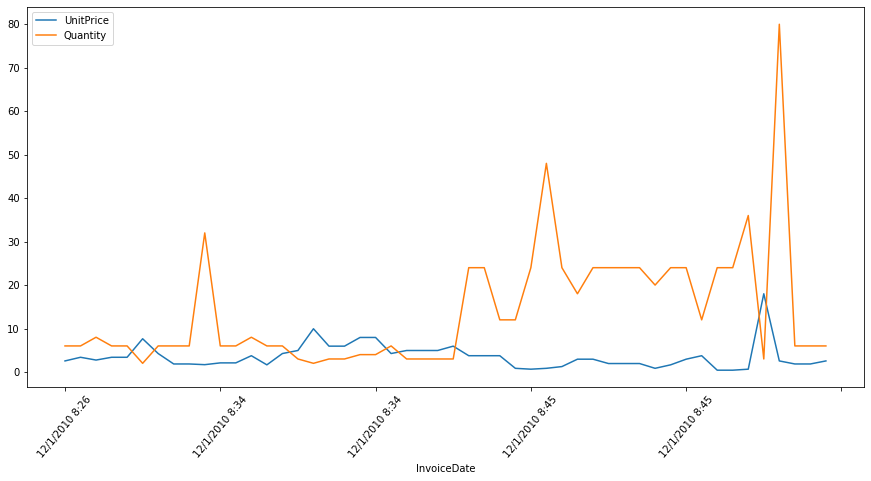

In [43]:
Ec.head(50).plot(x="InvoiceDate", y=["UnitPrice", "Quantity"], kind="line", figsize=(15,7))
plt.xticks(rotation=50)
plt.show()

## l. Plot the skewness - All Numeric Variables

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


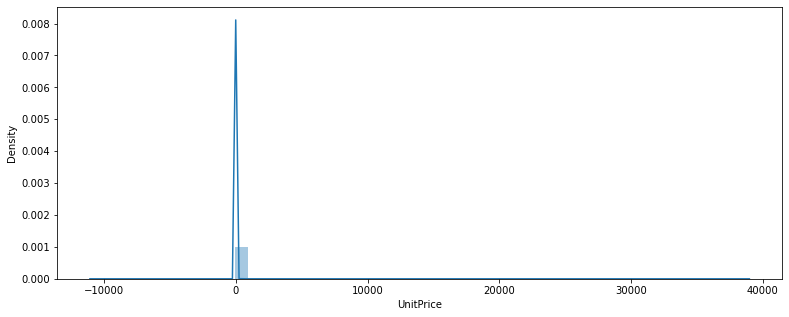

In [45]:
plt.figure(figsize = (13,5))
sns.distplot(Ec["UnitPrice"])
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


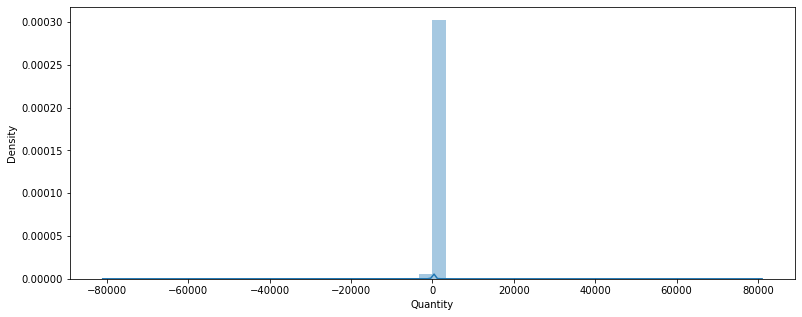

In [46]:
plt.figure(figsize = (13,5))
sns.distplot(Ec["Quantity"])
plt.show()

In [47]:
Ec.skew(axis = 0,skipna = True)

Quantity       -0.264076
UnitPrice     186.506972
CustomerID      0.029835
dtype: float64

# Task 2. Check for missing values in all columns and replace them with the appropriate metric 
(Mean/Median/Mode)

In [48]:
Ec.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [49]:
Ec.CustomerID.describe()

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

In [50]:
Ec["CustomerID"] = Ec["CustomerID"].fillna(15289)#use mean value for fillna

In [51]:
Ec["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
WHITE ANEMONE ARTIFICIAL FLOWER          1
sold as set on dotcom and amazon         1
lost in space                            1
SET 12 COLOURING PENCILS DOILEY          1
LIGHT DECORATION BATTERY OPERATED        1
Name: Description, Length: 4223, dtype: int64

In [52]:
Ec["Description"] = Ec["Description"].fillna(2369)#use highst mode value

In [53]:
Ec.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Task 3. Remove duplicate rows

In [54]:
Ec.drop_duplicates(keep = False,inplace = True)

In [55]:
Ec.shape

(531762, 8)

# Task 4. Remove rows which have negative values in Quantity column 


In [56]:
Ec = Ec[Ec.Quantity > 0]


In [57]:
Ec.head(1000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1050,536522,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,2,12/1/2010 12:49,3.75,15012.0,United Kingdom
1051,536522,21190,PINK HEARTS PAPER GARLAND,1,12/1/2010 12:49,1.65,15012.0,United Kingdom
1052,536522,84997C,BLUE 3 PIECE POLKADOT CUTLERY SET,1,12/1/2010 12:49,3.75,15012.0,United Kingdom
1053,536522,21810,CHRISTMAS HANGING STAR WITH BELL,1,12/1/2010 12:49,1.25,15012.0,United Kingdom


# Task 5. Add the columns - Month, Day and Hour for the invoice 


In [71]:
Ec['InvoiceDate'] = pd.to_datetime(Ec.InvoiceDate, format='%m/%d/%Y %H:%M')

<ipython-input-71-907262d8c5cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ec['InvoiceDate'] = pd.to_datetime(Ec.InvoiceDate, format='%m/%d/%Y %H:%M')


In [59]:
Ec.insert(loc=5, column='Year', value=Ec.InvoiceDate.dt.year)
Ec.insert(loc=6, column='Month', value=Ec.InvoiceDate.dt.month)
Ec.insert(loc=7, column='Day', value=Ec.InvoiceDate.dt.day)
Ec.insert(loc=8, column='Hour', value=Ec.InvoiceDate.dt.hour)


In [60]:
Ec.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Year,Month,Day,Hour,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010,12,1,8,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010,12,1,8,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010,12,1,8,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010,12,1,8,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010,12,1,8,3.39,17850.0,United Kingdom


# task 6. How many orders made by the customers?

In [61]:
orders = Ec.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
orders = orders.sort_values(by='InvoiceNo', ascending=False)
orders

,CustomerID,Country,InvoiceNo
2177,15289.0,United Kingdom,131950
4027,17841.0,United Kingdom,7523
1888,14911.0,EIRE,5667
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4243
...,...,...,...
794,13391.0,United Kingdom,1
2761,16093.0,United Kingdom,1
2751,16078.0,United Kingdom,1
2749,16073.0,United Kingdom,1


# Task 7. TOP 5 customers with higher number of orders 

In [62]:
print('The TOP 5 customers with most number of orders : ')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with most number of orders : 


,CustomerID,Country,InvoiceNo
2177,15289.0,United Kingdom,131950
4027,17841.0,United Kingdom,7523
1888,14911.0,EIRE,5667
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4243


# Task 8. How much money spent by the customers?

In [63]:
Ec['amount_spent'] = Ec['Quantity'] *Ec['UnitPrice']

<ipython-input-63-f2ffb9b559e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ec['amount_spent'] = Ec['Quantity'] *Ec['UnitPrice']


In [64]:
Amount_Spent = Ec.groupby(by=['CustomerID','Country'], as_index=False)['amount_spent'].sum()
Amount_Spent = Amount_Spent.sort_values(by='amount_spent', ascending=False)
Amount_Spent

,CustomerID,Country,amount_spent
2177,15289.0,United Kingdom,1.695426e+06
1698,14646.0,Netherlands,2.802060e+05
4218,18102.0,United Kingdom,2.596573e+05
3745,17450.0,United Kingdom,1.942308e+05
3025,16446.0,United Kingdom,1.684725e+05
...,...,...,...
4115,17956.0,United Kingdom,1.275000e+01
3031,16454.0,United Kingdom,6.900000e+00
1802,14792.0,United Kingdom,6.200000e+00
3234,16738.0,United Kingdom,3.750000e+00


# Task 9. TOP 5 customers with highest money spent

In [65]:
Amount_Spent.head()

,CustomerID,Country,amount_spent
2177,15289.0,United Kingdom,1.695426e+06
1698,14646.0,Netherlands,2.802060e+05
4218,18102.0,United Kingdom,2.596573e+05
3745,17450.0,United Kingdom,1.942308e+05
3025,16446.0,United Kingdom,1.684725e+05


# Task 10. How many orders per month? 


In [66]:
Ec['year_month'] = Ec['Year'].map(str) + '-' + Ec['Month'].map(str)
Per_Month = Ec.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index()
Per_Month

<ipython-input-66-f8f1aa2e539c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ec['year_month'] = Ec['Year'].map(str) + '-' + Ec['Month'].map(str)


TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[2010-12]    1629
[2011-1]     1120
[2011-10]    2129
[2011-11]    2884
[2011-12]     839
[2011-2]     1126
[2011-3]     1531
[2011-4]     1318
[2011-5]     1731
[2011-6]     1575
[2011-7]     1539
[2011-8]     1409
[2011-9]     1896
Name: year_month, dtype: int64

# Task 11. How many orders per day? 


In [50]:
per_day = Ec.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index()
per_day

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1]     780
[2]     686
[3]     577
[4]     708
[5]     795
[6]     881
[7]     851
[8]     886
[9]     732
[10]    723
[11]    701
[12]    556
[13]    641
[14]    732
[15]    641
[16]    704
[17]    766
[18]    686
[19]    566
[20]    728
[21]    702
[22]    626
[23]    644
[24]    646
[25]    631
[26]    497
[27]    610
[28]    712
[29]    444
[30]    507
[31]    367
Name: Day, dtype: int64

# Task 12. How many orders per hour? 


In [67]:
per_hour = Ec.groupby('InvoiceNo')['Hour'].unique().value_counts()
per_hour

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[12]        3322
[13]        2818
[14]        2557
[15]        2474
[11]        2472
[10]        2431
[9]         1538
[16]        1404
[17]         738
[8]          568
[18]         209
[19]         146
[7]           29
[20]          18
[6]            1
[11, 12]       1
Name: Hour, dtype: int64

# Task 13. How many orders for each country?

In [68]:
orders_country = Ec.groupby('Country')['InvoiceNo'].count().sort_values()
orders_country

Country
Saudi Arabia                 9
Bahrain                     18
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Hong Kong                  276
Israel                     289
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Unspecified                438
Sweden                     449
Cyprus                     593
Finland                    685
Channel Islands            746
Italy                      758
Norway                    1072
Australia                 1183
Portugal                  1484
Switzerland               1951
Belgium                   2031


# Task 14. Orders trend across months

In [72]:
Ec['year_month'] = Ec['Year'].map(str) + '-' + Ec['Month'].map(str)
Orders_Month = Ec.groupby('InvoiceNo')['year_month'].sum()
Orders_Month

<ipython-input-72-9f95f6270019>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ec['year_month'] = Ec['Year'].map(str) + '-' + Ec['Month'].map(str)


InvoiceNo
536365     2010-122010-122010-122010-122010-122010-122010-12
536366                                        2010-122010-12
536367     2010-122010-122010-122010-122010-122010-122010...
536368                          2010-122010-122010-122010-12
536369                                               2010-12
                                 ...                        
581586                          2011-122011-122011-122011-12
581587     2011-122011-122011-122011-122011-122011-122011...
A563185                                               2011-8
A563186                                               2011-8
A563187                                               2011-8
Name: year_month, Length: 20726, dtype: object

# Task 15. How much money spent by each country?

In [69]:
Ec['amount_spent'] = Ec['Quantity'] *Ec['UnitPrice']
Money_spent_country = Ec.groupby('Country')['amount_spent'].sum().sort_values()
Money_spent_country

<ipython-input-69-66f72a4091e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ec['amount_spent'] = Ec['Quantity'] *Ec['UnitPrice']


Country
Saudi Arabia            1.459200e+02
Bahrain                 7.541400e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Unspecified             4.732090e+03
Greece                  4.760520e+03
Poland                  7.334650e+03
Israel                  8.123560e+03
Austria                 1.019868e+04
Cyprus                  1.341947e+04
Hong Kong               1.527420e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.043064e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.362155e+04
Norway                  3.6165